In [3]:
import helper
import matplotlib.pyplot as plt
from keras.applications import *
import numpy as np

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [4]:
dog_path = './data/train2/dog'
cat_path = './data/train2/cat'
dog_outlier_path = './data/train2_outliers/dog'
cat_outlier_path = './data/train2_outliers/cat'
img_size =(299,299)
threshold = 2000

In [5]:
#训练集中dog尺寸过小的图片

dog_files, dog_images_shapes = helper.get_images_and_shapes(dog_path)
dog_images_sizes = [shape[0]*shape[1] for shape in dog_images_shapes]

cat_files, cat_images_shapes = helper.get_images_and_shapes(cat_path)
cat_images_sizes = [shape[0]*shape[1] for shape in cat_images_shapes]


finished
finished


In [6]:
images_sizes = np.concatenate((dog_images_sizes, cat_images_sizes), axis=0)

print(images_sizes.min())
print(images_sizes.max())
print(images_sizes.mean())
print(images_sizes.std())
print(images_sizes.mean()-3*images_sizes.std())
print(images_sizes.mean()+3*images_sizes.std())

1900
785664
151188.3904
59405.9573991544
-27029.481797463202
329406.2625974632


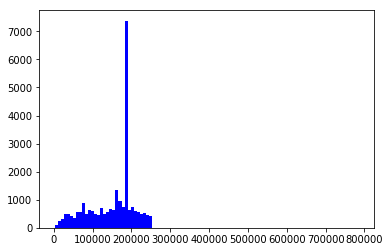

In [7]:
n, bins, patches = plt.hist(images_sizes, 100,facecolor = 'blue')
 
plt.show()

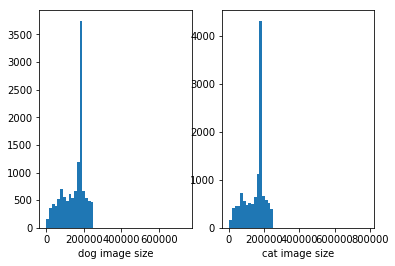

In [8]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.xlabel("dog image size")
plt.hist(dog_images_sizes,50)
fig.add_subplot(1,2,2)
plt.xlabel("cat image size")
plt.hist(cat_images_sizes,50)

plt.show()

1
1
1


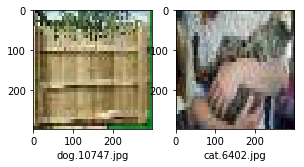

In [9]:
#训练集中cat尺寸过小的图片
dog_size_outliers =[]
for ii, image_file in enumerate(dog_files):
    if dog_images_sizes[ii] < threshold:
        dog_size_outliers.append(image_file)
print(len(dog_size_outliers))

#helper.visual_images(dog_size_outliers, img_size)

cat_size_outliers =[]
for ii, image_file in enumerate(cat_files):
    if cat_images_sizes[ii] < threshold:
        cat_size_outliers.append(image_file)
print(len(cat_size_outliers))

#helper.visual_images(cat_size_outliers, img_size)
size_outliers = dog_size_outliers + cat_size_outliers
helper.visual_images(size_outliers, (299,299))

In [10]:
model = helper.get_basic_classifier_model(inception_v3.InceptionV3)
dogs = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']
cats=['n02123045','n02123159','n02123394','n02123597','n02124075','n02125311','n02127052']
print("finished")

finished


In [11]:
#训练集dog中并不是dog的图片
X_train_dogs, dog_files = helper.get_input_from_folder_with_image_files(dog_path, img_size, inception_v3.preprocess_input) 
print("finished")

finished
finished


In [ ]:
dogs_outliers = helper.get_outliers_for_one_class(model, X_train_dogs, dog_files, 40, dogs, inception_v3.decode_predictions)
print("finished")
helper.visual_images(dogs_outliers, img_size)
print("finished")

In [ ]:
#训练集cat中并不是cat的图片
X_train_cats, cat_files = helper.get_input_from_folder_with_image_files(cat_path, img_size, inception_v3.preprocess_input)

print("finished")

finished predicting
23
['./data/train2/cat/cat.9983.jpg', './data/train2/cat/cat.9171.jpg', './data/train2/cat/cat.2337.jpg', './data/train2/cat/cat.335.jpg', './data/train2/cat/cat.5418.jpg', './data/train2/cat/cat.7194.jpg', './data/train2/cat/cat.4688.jpg', './data/train2/cat/cat.7564.jpg', './data/train2/cat/cat.12272.jpg', './data/train2/cat/cat.5351.jpg']
finished
3


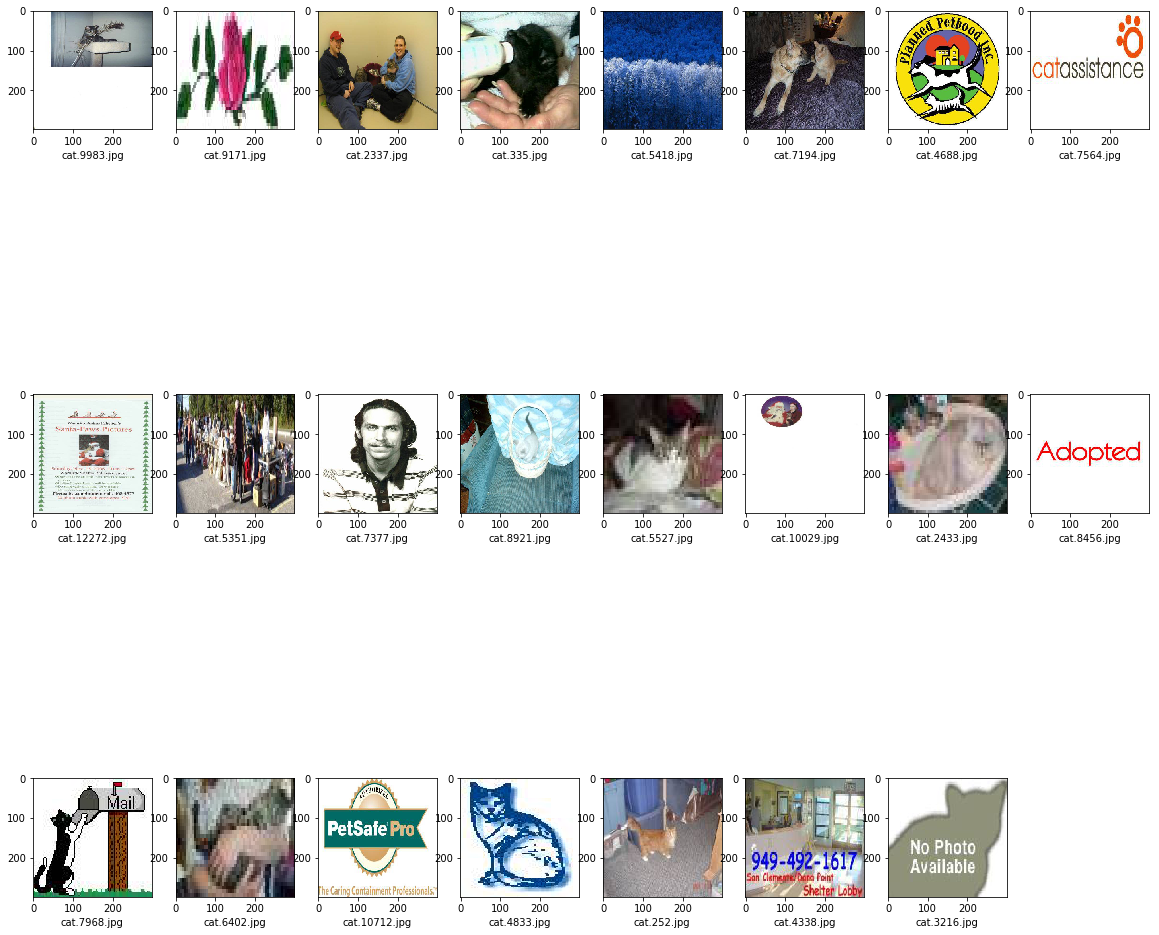

finished


In [20]:
cats_outliers = helper.get_outliers_for_one_class(model, X_train_cats, cat_files, 150, cats, inception_v3.decode_predictions)
print("finished")
helper.visual_images(cats_outliers, img_size)
print("finished")

In [15]:
#特别小的图片实际上在predict时准确率也不高，在处理非猫非狗的异常值时也包含这些尺寸特别小图了
helper.move_files_to_new_folder(dogs_outliers, dog_outlier_path)
helper.move_files_to_new_folder(cats_outliers, cat_outlier_path)